<a href="https://colab.research.google.com/github/tusharkanta/ML_DL/blob/eva/S12/S12KMeansAnchor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os,json,math
import matplotlib.pyplot as plt
import numpy as np
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric
import cv2
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd
%matplotlib inline
from tqdm.notebook import tqdm, trange
path = './Dogimages/'
from skimage import io
imagesizesdict = {}
for fileobj in os.listdir(path):
  imgobj = io.imread(f'{path}{fileobj}', as_gray=False, pilmode="RGB")
  imagesizesdict[fileobj] = imgobj.shape[:2]

In [0]:
annot_json = json.load(open('dog_annotations.json'))
df = pd.DataFrame()
datadict = []
for k, v in annot_json.items():
  for row in v['regions']:
    rec = {'name': v['filename'] }
    shape = row['shape_attributes']
    h, w = imagesizesdict[v['filename']]
    rec['h'] = shape['height']
    rec['w'] = shape['width']
    rec['x'] = shape['x']
    rec['y'] = shape['y']
    rec['image_w'] = w
    rec['image_h'] = h
    rec['height'] = shape['height']/h
    rec['width'] = shape['width']/w
    rec['log_height'] = math.log(shape['height']/h)
    rec['log_width'] = math.log(shape['width']/h)

    datadict.append(rec)


df = pd.DataFrame.from_dict(datadict, orient='columns')
df


,name,h,w,x,y,image_w,image_h,height,width,log_height,log_width
0,0.jpg,275,289,83,27,500,375,0.733333,0.578000,-0.310155,-0.260499
1,1.jpg,434,265,38,40,327,500,0.868000,0.810398,-0.141564,-0.634878
2,10.jpg,242,232,21,16,269,293,0.825939,0.862454,-0.191235,-0.233435
3,11.jpg,85,114,13,11,135,102,0.833333,0.844444,-0.182322,0.111226
4,12.jpg,47,2,68,64,98,162,0.290123,0.020408,-1.237449,-4.394449
5,12.jpg,153,88,3,2,98,162,0.944444,0.897959,-0.057158,-0.610260
6,13.jpg,418,304,45,3,363,428,0.976636,0.837466,-0.023642,-0.342095
7,14.jpg,313,432,42,34,500,387,0.808786,0.864000,-0.212222,0.110001
8,15.jpg,318,486,7,40,500,375,0.848000,0.972000,-0.164875,0.259283
9,16.jpg,305,309,153,55,500,381,0.800525,0.618000,-0.222488,-0.209458


In [0]:
def iou(box, centroids):
    x = np.minimum(np.exp(centroids[:, 0]), np.exp(box[0]))
    y = np.minimum(np.exp(centroids[:, 1]), np.exp(box[1]))

    intersection = x * y
    box_area = np.exp(box[0]) * np.exp(box[1])
    centroid_area = np.exp(centroids[:, 0]) * np.exp(centroids[:, 1])

    iou_ = intersection / (box_area + centroid_area - intersection)
    
    return (np.max(iou_), np.argmax(iou_))

X = df[['log_width', 'log_height']].to_numpy()

In [0]:
distortionslist = [] 
inertiaslist = [] 
mapping1 = {} 
mapping2 = {} 
centroids = {}
memberships = {}
miou = []
K = range(1, 21)

for k in K:
  kmeansModel = KMeans(n_clusters=k).fit(X)
  distortionslist.append(sum(np.min(cdist(X, kmeansModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
  inertiaslist.append(kmeansModel.inertia_) 

  mapping1[k] = sum(np.min(cdist(X, kmeansModel.cluster_centers_, 
                'euclidean'),axis=1)) / X.shape[0] 
  mapping2[k] = kmeansModel.inertia_ 
  centroids[k] = kmeansModel.cluster_centers_
  maxiou = np.array([iou(b, centroids[k])  for b in X])
  memberships[k] = maxiou[:, 1].astype(np.uint8)
  miou.append(np.mean(maxiou[:, 0]))

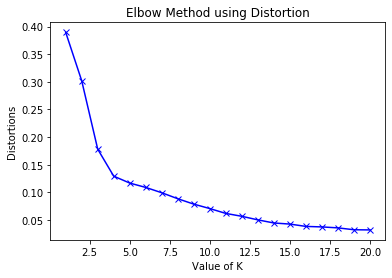

In [0]:
plt.plot(K, distortionslist, 'bx-') 
plt.xlabel('Value of K') 
plt.ylabel('Distortions') 
plt.title('Elbow Method using Distortion') 
plt.show() 

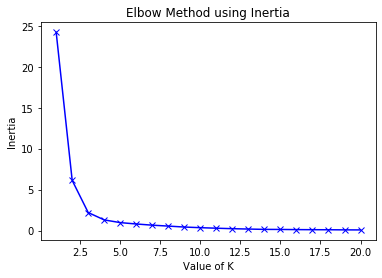

In [0]:
plt.plot(K, inertiaslist, 'bx-') 
plt.xlabel('Value of K') 
plt.ylabel('Inertia') 
plt.title('Elbow Method using Inertia') 
plt.show() 

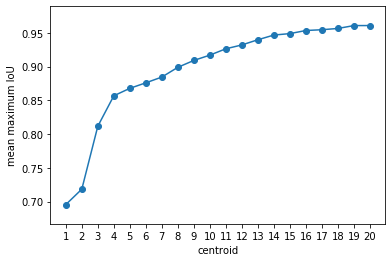

In [0]:
def IoUPlot(X, Y):
  plt.scatter(X, Y)
  plt.plot(X, Y)
  plt.xlabel("centroid")
  plt.ylabel("mean maximum IoU")
  plt.xticks(np.arange(1, 21))
  plt.show()

IoUPlot(K, miou)

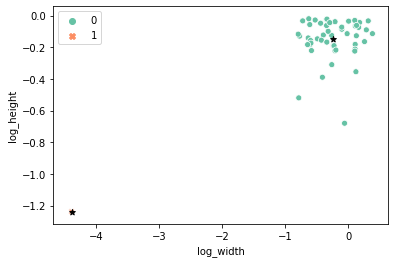

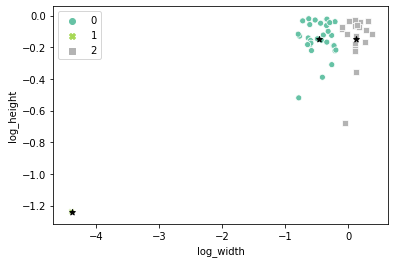

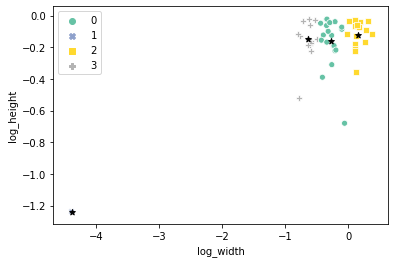

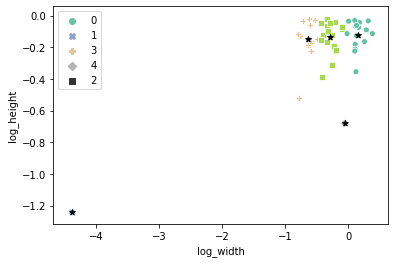

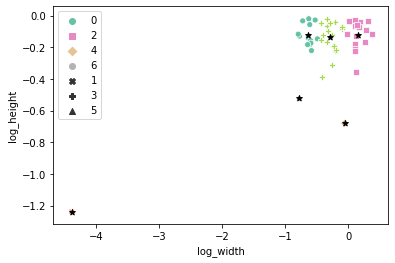

In [0]:
import seaborn as sns
def plotclusters(k):
  ax = sns.scatterplot('log_width', 'log_height', data=df, hue=memberships[k], style = memberships[k], palette="Set2")
  ax.scatter(centroids[k][:,0], centroids[k][:,1], marker='*', c='black')
  plt.show()

for k in range(2,7):
  plotclusters(k)

In [0]:
def ioudistance(box, centroid):
    #print(centroid)
    x = np.minimum(np.exp(centroid[0]), np.exp(box[0]))
    y = np.minimum(np.exp(centroid[1]), np.exp(box[1]))

    intersection = x * y
    box_area = np.exp(box[0]) * np.exp(box[1])
    centroid_area = np.exp(centroid[0]) * np.exp(centroid[1])

    iou_ = intersection / (box_area + centroid_area - intersection)
    return 1 - iou_

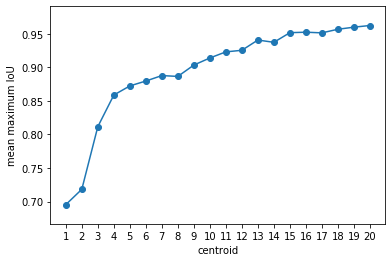

In [0]:
metric = distance_metric(type_metric.USER_DEFINED, func=ioudistance)
clusters = []
final_centers = []
mean_iou = []
for k in K:
  
  initial_centers = kmeans_plusplus_initializer(X, k).initialize()

  if k==1:
    kmeans_instance = kmeans(X, initial_centers)  
  else:
    kmeans_instance = kmeans(X, initial_centers, metric=metric)

  kmeans_instance.process()
  clusters.append(kmeans_instance.get_clusters())
  c = np.array(kmeans_instance.get_centers())
  final_centers.append(c)
  maxiou = np.array([iou(b, c)  for b in X])
  mean_iou.append(np.mean(maxiou[:, 0]))
IoUPlot(K, mean_iou)

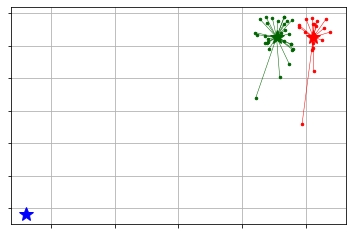

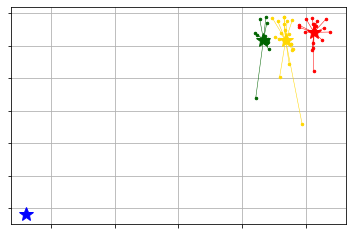

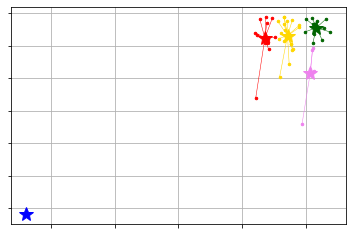

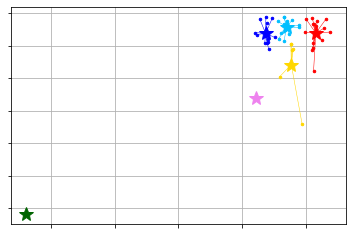

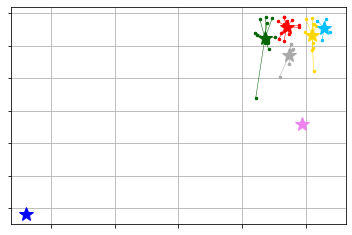

In [0]:
for k in range(2, 7):
  kmeans_visualizer.show_clusters(X, clusters[k], final_centers[k])

In [0]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

def make_anchor_boxes(ax, clusters, facecolor='None', edgecolor='b', alpha=1):

    xdata = np.array([0.5]*len(clusters))
    ydata = np.array([0.5]*len(clusters))

    xerr = np.array([list(np.exp(clusters[:, 0])/2)]*2)
    yerr = np.array([list(np.exp(clusters[:, 1])/2)]*2)
    
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for x, y, xe, ye in zip(xdata, ydata, xerr.T, yerr.T):
        rect = Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
        errorboxes.append(rect)

    
    pcoll = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    
    ax.add_collection(pcoll)

    # Plot errorbars
    errorbars = ax.errorbar(xdata, ydata, xerr=xerr, yerr=yerr,
                          fmt='None', ecolor='None')

    return errorbars

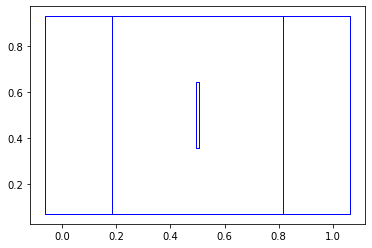

In [0]:
fig, ax = plt.subplots(1)

_ = make_anchor_boxes(ax, final_centers[2])

plt.show()